In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from common import set_plot_style, load_font

In [2]:
ROOT_FOLDER = Path("/home/robin/projects/TEDx/")

file_csv = ROOT_FOLDER / "data" / "Travel" / "carbon-footprint-travel-mode.csv"

images_dir = Path(ROOT_FOLDER / "output" / "images" / "travel")
images_dir.mkdir(parents=True, exist_ok=True)

load_font()
set_plot_style()

In [3]:
em = pd.read_csv(file_csv, index_col="Mezzo")
em = em.drop(columns=["Code", "Year"])
em = em.sort_values(by="Emissioni per chilometro viaggiato")
em.head()

,Emissioni per chilometro viaggiato
Mezzo,
Traghetto,18.74
Corriera,27.33
Metropolitana,27.81
Tram,28.61
Treno nazionale,35.49


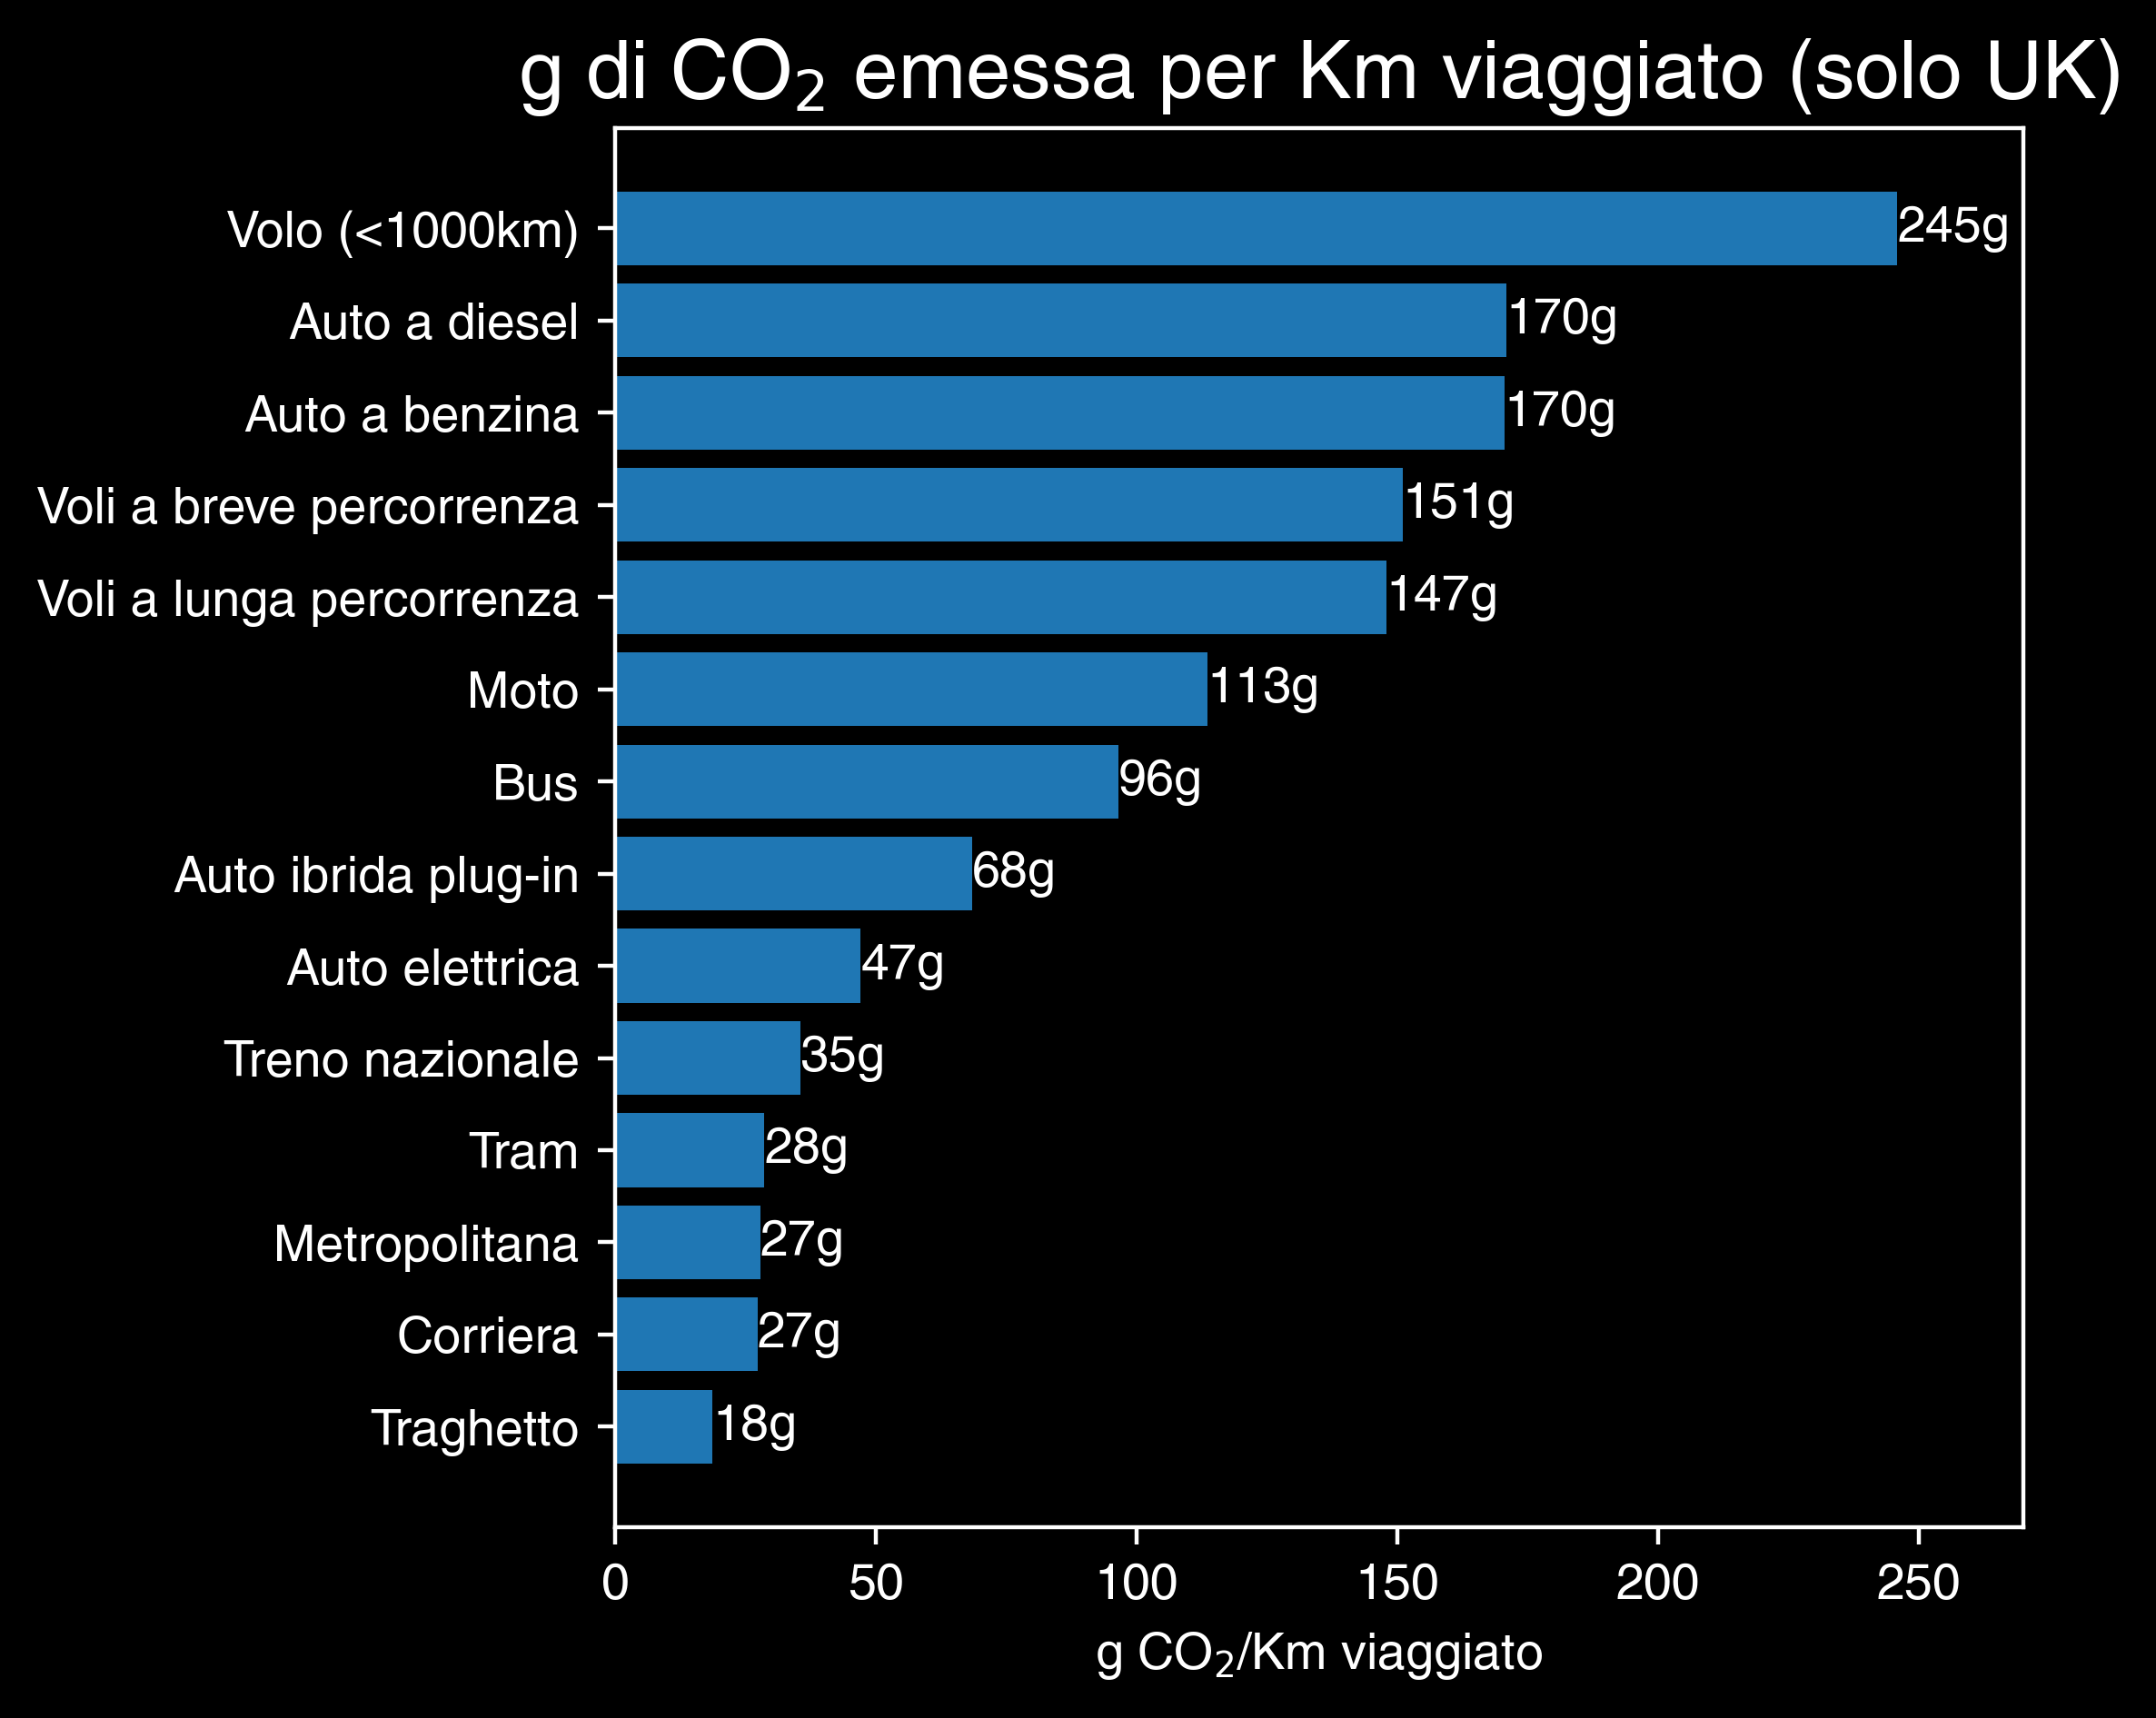

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
bars = ax.barh(em.index, em["Emissioni per chilometro viaggiato"])
ax.bar_label(bars, fmt="%dg")
ax.set_title("g di CO$_2$ emessa per Km viaggiato (solo UK)")
ax.set_xlabel("g CO$_2$/Km viaggiato")
ax.set_ylabel(None)
ax.set_xlim(right=270)

plt.show()
fig.savefig(images_dir / "travel_emissions.svg")